[-431.99298 -417.88788 -503.1489  -380.73895 -422.464   -362.4092
 -449.14014 -422.14148 -475.69446 -448.29144 -420.35605 -520.6118
 -357.59766 -476.3095  -414.52637 -436.7832  -403.38007 -429.6994
 -478.7345  -402.86932] 

r2score=0.8381118178367615 
 mse=283.704833984375 
 rmse=16.84354019165039 
 mape=0.0301233786494985
[[-433.492      170.18654     21.413382 ]
 [-429.98898    155.3944      14.340164 ]
 [-523.0284     177.57582     39.097496 ]
 [-343.79047    151.07066     18.177563 ]
 [-439.69824    159.64134     18.314892 ]
 [-361.44827    152.52634     23.054203 ]
 [-475.42523    171.00089     23.212412 ]
 [-403.66895    157.81583     11.408081 ]
 [-488.89566    163.32832     44.108425 ]
 [-516.8884     176.25124     37.649414 ]
 [-399.71228    134.4023      34.76244  ]
 [-497.22784    172.23201     40.990726 ]
 [-363.66425    155.73544      4.8552246]
 [-508.2658     173.77562     34.59073  ]
 [-410.10883    172.2568      18.578373 ]
 [-379.2141     145.51608     26.630754 ]
 [-

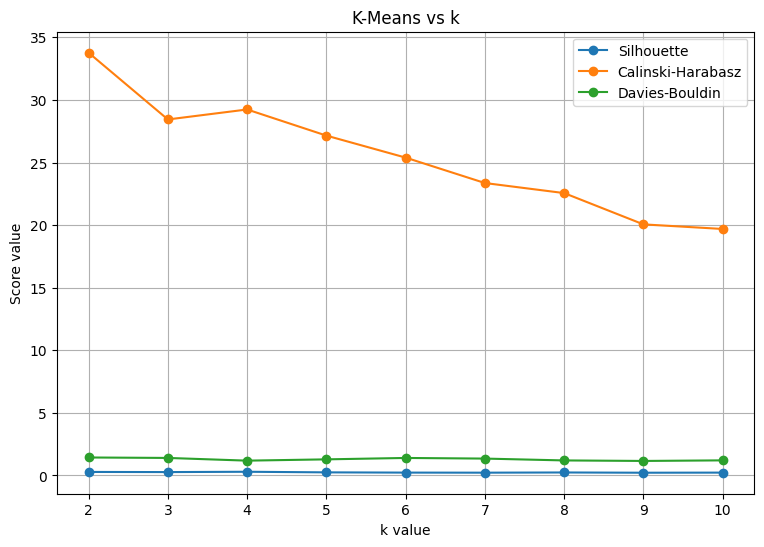

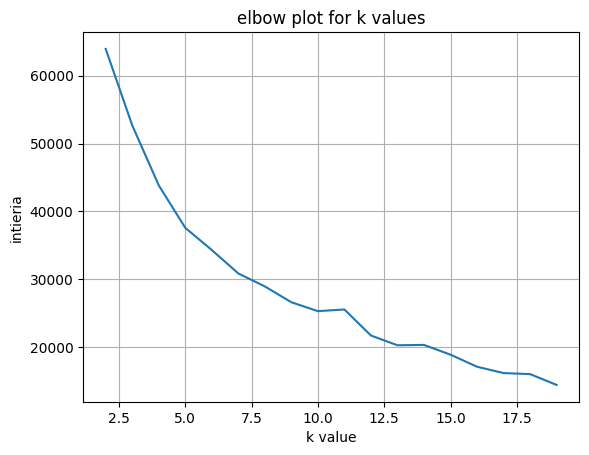

In [ ]:
import os
import numpy as np
import librosa
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt


# Define the folder containing audio files
audio_folder = 'con_wav'

# List all .wav files and take only the first 100
audio_files = sorted([f for f in os.listdir(audio_folder) if f.endswith('.wav')])[:100]

# Function to extract MFCC features
def extract_features(filename):
    full_path = os.path.join(audio_folder, filename)
    y, sr = librosa.load(full_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfcc, axis=1)

#linear regression funtion
def A1(audio_files):

    # Extract features for the first 100 files
    mfcc_features = [extract_features(f) for f in audio_files]

    # Prepare input and output arrays
    X = np.array([mfcc[1:] for mfcc in mfcc_features])  # MFCCs 1 to 12
    Y = np.array([mfcc[0] for mfcc in mfcc_features])   # MFCC 0 as target

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression().fit(X_train, y_train)

    # Predict and print results
    y_test_pred = model.predict(X_test)
    return y_test_pred,y_test,X_train



#Calculating MSE, RMSE, MAPE and R2 scores
def A2(y_test_pred,y_test):
    r2score=r2_score(y_test_pred,y_test)
    mse=mean_squared_error(y_test_pred,y_test)
    rmse=root_mean_squared_error(y_test_pred,y_test)
    mape=mean_absolute_percentage_error(y_test_pred,y_test)

    print(f"r2score={r2score} \n mse={mse} \n rmse={rmse} \n mape={mape}")
    
# for more than 1 attribute
def A3(audio_files, target_indices=[0], feature_indices=None):
   
    # Extract MFCC features
    mfcc_features = [extract_features(f) for f in audio_files]
    mfcc_features = np.array(mfcc_features)

    # Default feature indices: all except target indices
    if feature_indices is None:
        feature_indices = [i for i in range(mfcc_features.shape[1]) if i not in target_indices]

    # Prepare input and output arrays
    X = mfcc_features[:, feature_indices]
    Y = mfcc_features[:, target_indices]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression().fit(X_train, y_train)

    # Predict
    y_test_pred = model.predict(X_test)
    print(y_test_pred,'\n')

    # Evaluate
    r2score = r2_score(y_test, y_test_pred, multioutput='uniform_average')
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_test_pred)

    print(f"Target MFCC indices: {target_indices}")
    print(f"Feature MFCC indices: {feature_indices}")
    print(f"R Score: {r2score:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}\n")


def A4(X_train):
    kmeans = KMeans(n_clusters=2, random_state=0,n_init="auto").fit(X_train)
    kmeans.fit(X_train)

    print(kmeans.labels_)
    print(kmeans.cluster_centers_)

def A5(X_train):
    kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)
    silhouette_score(X_train, kmeans.labels_)
    calinski_harabasz_score(X_train, kmeans.labels_)
    davies_bouldin_score(X_train, kmeans.labels_)
    
def A6(X_train):
    k_values=range(2,11)
    sil_scores=[]
    calinski_scores=[]
    davies_scores=[]

    for k in k_values:
        kmeans=KMeans(n_clusters=k,random_state=42,n_init="auto")
        kmeans.fit(X_train)
        labels=kmeans.labels_

        sil_scores.append(silhouette_score(X_train,labels))
        calinski_scores.append(calinski_harabasz_score(X_train,labels))
        davies_scores.append(davies_bouldin_score(X_train,labels))

    plt.figure(figsize=(9,6))
    plt.plot(k_values,sil_scores,'-o',label='Silhouette')
    plt.plot(k_values,calinski_scores,'-o',label='Calinski-Harabasz')
    plt.plot(k_values,davies_scores,'-o',label='Davies-Bouldin')
    plt.xlabel('k value')
    plt.ylabel('Score value')
    plt.title('K-Means vs k')
    plt.legend()
    plt.grid(True)
    plt.show()
    

def A7(X_train):
    distortions=[]
    for k in range(2,20):
        kmeans=KMeans(n_clusters=k).fit(X_train)
        distortions.append(kmeans.inertia_)

    plt.plot(range(2,20),distortions)
    plt.xlabel('k value')
    plt.ylabel('intieria')
    plt.title('elbow plot for k values')
    plt.grid(True)
    plt.show()
    


# A1
y_test_pred,y_test,X_train=A1(audio_files)
print(y_test_pred,'\n') 


#A2
A2(y_test_pred,y_test)

#A3
A3(audio_files, target_indices=[0, 1, 2], feature_indices=list(range(3, 13)))

#A4
A4(X_train)

#A5
A5(X_train)
print('\n')

#A6
A6(X_train)

A7(X_train)